# Emotion Classification: Addressing Class Imbalance Using Synonym-Based Data Augmentation

In this Colab notebook, we tackle the class imbalance problem in the combined **ISEAR** and **GoEmotions** dataset using **data augmentation**. Our augmentation technique leverages **synonym replacement** to generate new samples for minority classes, thereby balancing the dataset.

### Key Highlights:
1. **Class Imbalance Problem:**
   - Imbalanced datasets can negatively impact model performance by biasing predictions towards majority classes.
   - This notebook focuses on increasing the representation of minority emotion classes while preserving data diversity.

2. **Data Augmentation Technique:**
   - Synonym Replacement: Words in a sentence are randomly replaced with their synonyms to generate new samples while maintaining semantic meaning.
   - This method effectively increases the size of underrepresented classes without altering their core meaning.

3. **Augmentation Factors:**
   - The augmentation factor determines how many additional samples are generated for each class.
   - The **'joy'** class is already the majority and receives no augmentation (factor = 0).
   - For other emotions, augmentation factors are chosen based on their presence in the original dataset, ensuring the final class sizes are approximately balanced.

4. **Output:**
   - A new augmented dataset is generated and saved as **'Augmented_Emotion_Dataset.csv'**.
   - Visualizations demonstrate the balanced class distribution after augmentation.

This notebook demonstrates a practical approach to generating synthetic data for handling class imbalance in text datasets.


# Step 1: Import Libraries

In [1]:
from nltk.corpus import wordnet
import random
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install nltk

In [3]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Step 2: Load the combined dataset

In [4]:
# Load your dataset (example file paths, adjust as necessary)
df = pd.read_csv('Combined_Emotion_Dataset.csv')

# Step 3: Data augmentation using synonyms approach

**Description of the Data Augmentation Approach**
The synonym-based data augmentation method follows these steps:

**1. Wordnet Synonyms:**

- Use the WordNet lexical database to find synonyms for each word in a sentence.
- Replace up to n randomly chosen words with their synonyms to create a new sample.

**2. Augmentation Per Class:**
- Define custom augmentation factors for each class, ensuring minority classes are upsampled significantly.
- Example factors:
1. 'joy': 0 (no augmentation since it is the majority class).
2. 'anger': 3, 'sadness': 4, 'fear': 5, 'disgust': 10, etc.
- These factors are selected to balance class distributions in the augmented dataset.

**3. Repetition for Balance:**
For each sentence in the dataset, generate the specified number of augmented samples based on its class.

In [5]:
def get_synonyms(word):
    """Get a list of synonyms for a given word."""
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace('_', ' ')
            if synonym != word:  # Avoid adding the word itself
                synonyms.add(synonym)
    return list(synonyms)

def synonym_replacement(sentence, n=2):
    """
    Replace 'n' words in a sentence with their synonyms.
    - sentence: The original sentence to augment.
    - n: Number of words to replace with synonyms.
    """
    words = sentence.split()
    new_sentence = words[:]
    random_indices = list(range(len(words)))
    random.shuffle(random_indices)

    num_replaced = 0
    for idx in random_indices:
        word = words[idx]
        synonyms = get_synonyms(word)
        if synonyms:
            synonym = random.choice(synonyms)
            new_sentence[idx] = synonym
            num_replaced += 1
        if num_replaced >= n:
            break

    return ' '.join(new_sentence)

In [6]:
# Parameters for augmentation
# Define custom augmentation repetitions for each class (excluding "joy")
augmentation_factors = {
    'joy':0,
    'anger': 3,
    'sadness': 4,
    'neutral': 4,
    'fear': 5,
    'guilt': 7,
    'shame': 8,
    'disgust': 10,
    'confusion': 10,
    'surprise': 25,
    'boredom': 25
}

synonym_replacements_per_sentence = 2  # Number of words to replace in each sentence

# Create lists to store augmented data
augmented_texts = []
augmented_labels = []

# Perform augmentation based on specified repetitions per class
for _, row in df.iterrows():
    original_text = row['cleaned_text']
    label = row['EMOTION']

    # Get the augmentation factor for the current class
    augmentation_factor = augmentation_factors.get(label, 0)

    # If augmentation factor is 0 (e.g., for 'joy'), skip augmentation
    if augmentation_factor == 0:
        augmented_texts.append(original_text)
        augmented_labels.append(label)
        continue

    # Augment text based on the defined factor for each class
    for _ in range(augmentation_factor):
        augmented_text = synonym_replacement(original_text, synonym_replacements_per_sentence)
        augmented_texts.append(augmented_text)
        augmented_labels.append(label)

In [7]:
# Combine augmented data with original data
augmented_df = pd.DataFrame({
    'cleaned_text': augmented_texts,
    'EMOTION': augmented_labels
})

Number of samples for each class after augmentation:
EMOTION
joy          27648
sadness      23816
disgust      22840
guilt        22799
fear         21725
shame        21560
confusion    21150
anger        21006
neutral      20488
surprise     17025
boredom      16450
Name: count, dtype: int64


<ipython-input-8-a134ae03a9a3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


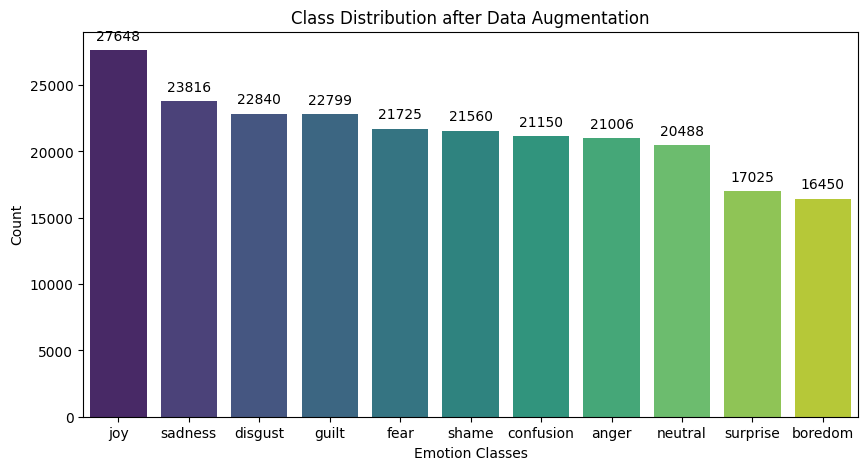

In [8]:
# Check the number of samples for each class after augmentation
class_counts = augmented_df['EMOTION'].value_counts()
print("Number of samples for each class after augmentation:")
print(class_counts)

# Plot the class distribution as a bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution after Data Augmentation")
plt.xlabel("Emotion Classes")
plt.ylabel("Count")

# Adding labels to bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.show()

## Save the new augmentated balanced dataset

In [9]:
# Save the augmented DataFrame to a new CSV file
augmented_df.to_csv('Augmented_Emotion_Dataset.csv', index=False)

print("Augmented data saved to 'Augmented_Emotion_Dataset.csv'")

Augmented data saved to 'Augmented_Emotion_Dataset.csv'
